### Actividad 2.1 (Regresión Lineal Simple y Múltiple)

Ivanna Maldonado Cervantes 

Paula Simonetta Madrid Pérez

Ania Diaz Gonzalez 

Miranda Eugenia Colorado Arróniz


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')

print("\nPrimeras filas del dataframe:")
df.head()


Primeras filas del dataframe:


,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,Achnanthes aapajaervensis,Achaa01,S04094200_20120910,S04094200,2012-09-10,8,420,19.047619
1,Achnanthes aapajaervensis,Achaa01,S05155300_20100728,S05155300,2010-07-28,1,404,2.475248
2,Achnanthes affinis,Achaf01,S02018780_20070808,S02018780,2007-08-08,1,400,2.500000
3,Achnanthes affinis,Achaf01,S02022675_20090803,S02022675,2009-08-03,2,400,5.000000
4,Achnanthes affinis,Achaf01,S02094920_20120726,S02094920,2012-07-26,1,400,2.500000


Revisamos las columnas y sus tipos de datos

In [3]:
print("\nNombre de las columnas y sus tipos de datos:")
df.dtypes


Nombre de las columnas y sus tipos de datos:


TaxonName                            object
TaxonCode                            object
SamplingOperations_code              object
CodeSite_SamplingOperations          object
Date_SamplingOperation               object
Abundance_nbcell                      int64
TotalAbundance_SamplingOperation      int64
Abundance_pm                        float64
dtype: object

Examinar las frecuencias de las variables categóricas "TaxonName", "TaxonCode", "SamplingOperations_code", "CodeSite_SamplingOperations" y "Date_SamplingOperation"

In [4]:
#Frecuencias de mayor a menor para cada una
print("\nFrecuencias de TaxonName:")
print(df['TaxonName'].value_counts())
print()

print("\nFrecuencias de TaxonCode:")
print(df['TaxonCode'].value_counts())
print()

print("\nFrecuencias de SamplingOperations_code:")
print(df['SamplingOperations_code'].value_counts())
print()

print("\nFrecuencias de CodeSite_SamplingOperations:")
print(df['CodeSite_SamplingOperations'].value_counts())
print()

print("\nFrecuencias de Date_SamplingOperation:")
print(df['Date_SamplingOperation'].value_counts())
print()


Frecuencias de TaxonName:
TaxonName
Achnanthes minutissima      43691
Amphora pediculus           39209
Cocconeis euglypta          38570
Sellaphora nigri            38039
Navicula cryptotenella      37723
                            ...  
Encyonopsis neoamphioxys        1
Encyonopsis recta               1
Lindavia bodanica               1
Leptocylindrus minimus          1
Eunotia perpusilla              1
Name: count, Length: 2292, dtype: int64


Frecuencias de TaxonCode:
TaxonCode
Achmi02    43691
Amppe02    39209
Coceu01    38570
Selni01    38039
Navcr09    37723
           ...  
Encne03        1
Encre01        1
Linbo01        1
Lepmi01        1
Eunpe02        1
Name: count, Length: 2292, dtype: int64


Frecuencias de SamplingOperations_code:
SamplingOperations_code
S05051000_20080722    97
S05119000_20160627    97
S05068700_20070904    94
S04103550_20150811    92
S04215520_20200702    92
                      ..
S05192040_20170914     2
S05224100_20080821     2
S05221600_20080826

Convertirlas a númericas según su frecuencia

In [5]:
df_numeric = df.copy()

variables_categoricas = ['TaxonName', 'TaxonCode', 'SamplingOperations_code', 
                        'CodeSite_SamplingOperations', 'Date_SamplingOperation']

for variable in variables_categoricas:    
    frecuencias = df[variable].value_counts() #Contamos las frecuencias
    
    mapeo = {} 
    for i, valor in enumerate(frecuencias.index): #Mapeamos el valor de la más frecuente a 1, y asi sucesivamente
        mapeo[valor] = i + 1
    df_numeric[variable] = df[variable].map(mapeo) #Aplicamos el mapeo a la columna

Verificamos los tipos del datos del df convertido

In [6]:
print("\nTipos de datos en el dataframe convertido:")
print(df_numeric.dtypes)


Tipos de datos en el dataframe convertido:
TaxonName                             int64
TaxonCode                             int64
SamplingOperations_code               int64
CodeSite_SamplingOperations           int64
Date_SamplingOperation                int64
Abundance_nbcell                      int64
TotalAbundance_SamplingOperation      int64
Abundance_pm                        float64
dtype: object


#### **Regresión lineal simple**

Calculamos las correlaciones entre todas las variables para identificar los 5 pares con mayor correlación

In [7]:
print("\nMatriz de correlación:")
Corr_Factors = df_numeric.corr()
Corr_Factors


Matriz de correlación:


,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
TaxonName,1.000000,1.000000,-0.107305,-0.011925,0.010478,-0.131807,0.010570,-0.131876
TaxonCode,1.000000,1.000000,-0.107305,-0.011925,0.010478,-0.131807,0.010570,-0.131876
SamplingOperations_code,-0.107305,-0.107305,1.000000,0.240210,0.071392,0.156950,-0.025725,0.157256
CodeSite_SamplingOperations,-0.011925,-0.011925,0.240210,1.000000,0.034921,0.041136,0.033326,0.040755
Date_SamplingOperation,0.010478,0.010478,0.071392,0.034921,1.000000,0.013898,0.037350,0.013482
Abundance_nbcell,-0.131807,-0.131807,0.156950,0.041136,0.013898,1.000000,0.006612,0.999606
TotalAbundance_SamplingOperation,0.010570,0.010570,-0.025725,0.033326,0.037350,0.006612,1.000000,-0.004262
Abundance_pm,-0.131876,-0.131876,0.157256,0.040755,0.013482,0.999606,-0.004262,1.000000


Encontramos el valor absoluto de todas las correlaciones entre las variables 

In [8]:
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
TaxonName,1.000000,1.000000,0.107305,0.011925,0.010478,0.131807,0.010570,0.131876
TaxonCode,1.000000,1.000000,0.107305,0.011925,0.010478,0.131807,0.010570,0.131876
SamplingOperations_code,0.107305,0.107305,1.000000,0.240210,0.071392,0.156950,0.025725,0.157256
CodeSite_SamplingOperations,0.011925,0.011925,0.240210,1.000000,0.034921,0.041136,0.033326,0.040755
Date_SamplingOperation,0.010478,0.010478,0.071392,0.034921,1.000000,0.013898,0.037350,0.013482
Abundance_nbcell,0.131807,0.131807,0.156950,0.041136,0.013898,1.000000,0.006612,0.999606
TotalAbundance_SamplingOperation,0.010570,0.010570,0.025725,0.033326,0.037350,0.006612,1.000000,0.004262
Abundance_pm,0.131876,0.131876,0.157256,0.040755,0.013482,0.999606,0.004262,1.000000


Graficamos el mapa de calor de los coeficientes de correlación

<Axes: >

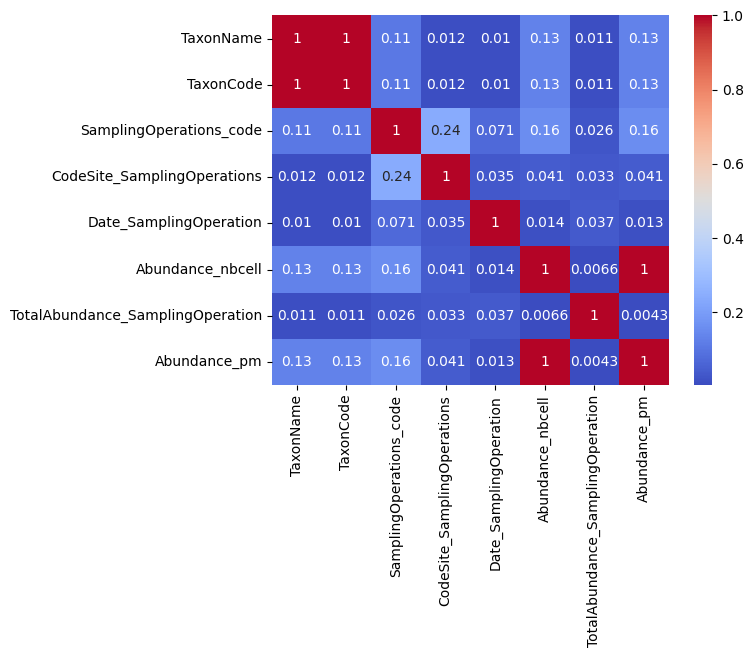

In [9]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm', annot=True)  
Heat_Map

Ajustamos el mapa de calor de los coeficientes de correlación 

<Axes: >

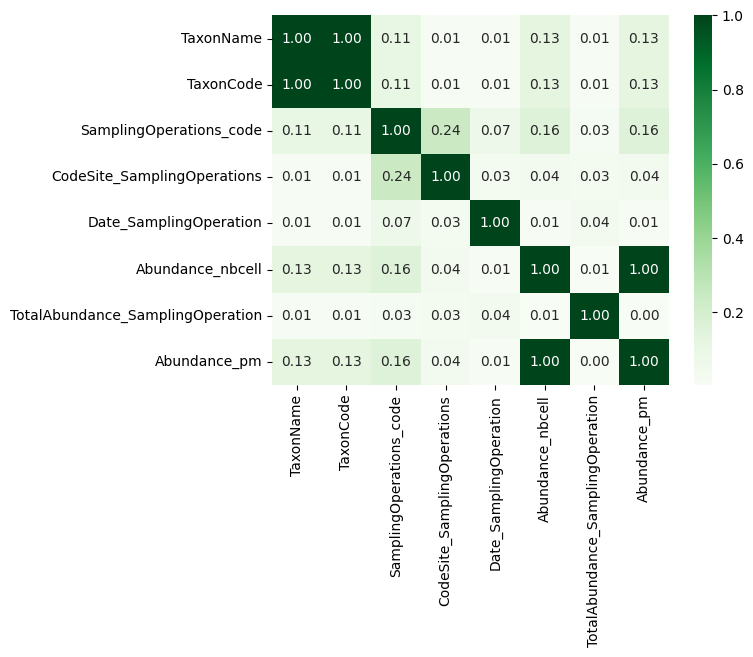

In [10]:
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'Greens', annot=True, fmt=".2f")  
Heat_Map

Tabla de los 5 pares:

In [11]:
# Creamos un DataFrame con los 5 pares y su interpretación
top5 = pd.DataFrame({
    'Par de Variables': [
        'TaxonName y TaxonCode',
        'Abundance_nbcell y Abundance_pm',
        'TotalAbundance_SamplingOperation y Abundance_pm',
        'TotalAbundance_SamplingOperation y Abundance_nbcell',
        'SamplingOperations_code y CodeSite_SamplingOperations'
    ],
    'Correlación': [1.00, 1.00, 1.00, 1.00, 0.24],
    'Interpretación': [
        'Correlación perfecta positiva, Ambas variables representan la misma información (especies) en diferente formato.',
        'Correlación perfecta positiva, Ambas miden abundancia de las mismas especies, solo en diferentes unidades.',
        'Correlación perfecta positiva, La abundancia total está directamente relacionada con la abundancia por muestra.',
        'Correlación perfecta positiva, Misma relación que el anterior, pero con la otra medida de abundancia.',
        'Correlación baja, Muestra una relación débil entre código de operación y sitio de muestreo.'
    ]
})
top5

,Par de Variables,Correlación,Interpretación
0,TaxonName y TaxonCode,1.00,"Correlación perfecta positiva, Ambas variables..."
1,Abundance_nbcell y Abundance_pm,1.00,"Correlación perfecta positiva, Ambas miden abu..."
2,TotalAbundance_SamplingOperation y Abundance_pm,1.00,"Correlación perfecta positiva, La abundancia t..."
3,TotalAbundance_SamplingOperation y Abundance_n...,1.00,"Correlación perfecta positiva, Misma relación ..."
4,SamplingOperations_code y CodeSite_SamplingOpe...,0.24,"Correlación baja, Muestra una relación débil e..."


#### **Regresión lineal múltiple**

*TaxonName*

In [12]:
Vars_Indep= df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']]
Var_Dep= df_numeric['TaxonName']


In [13]:
model= LinearRegression()

In [14]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_nbcell', 'Abundance_pm', 'SamplingOperations_code'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.0317946 , -0.24033951, -0.00095772]),
 'rank_': 3,
 'singular_': array([1.73987944e+07, 9.31621363e+04, 9.23479570e+02]),
 'intercept_': np.float64(116.62584742904217)}

In [16]:
model.score(Vars_Indep,Var_Dep)

0.025075083314315072

In [17]:
y_pred= model.predict(X=df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']])
y_pred

array([ 79.550099  ,  87.73210246,  94.42347634, ...,  84.70327927,
       111.55663045, 113.31350874], shape=(1643872,))

In [18]:
df_numeric.insert(0, 'PrediccionesTname0', y_pred)
df_numeric

,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,94.423476,521,521,22522,1138,949,1,400,2.500000
3,111.896494,521,521,3617,6381,499,2,400,5.000000
4,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...
1643867,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,111.556630,1342,1342,669,461,245,7,400,17.500000


In [19]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
Abundance_nbcell                  -0.131807             -0.031795
Abundance_pm                      -0.131876             -0.240340
SamplingOperations_code           -0.107305             -0.000958


*TaxonCode*

In [20]:
Vars_Indep= df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']]
Var_Dep= df_numeric['TaxonCode']

In [21]:
model= LinearRegression()

In [22]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['Abundance_nbcell', 'Abundance_pm', 'SamplingOperations_code'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.0317946 , -0.24033951, -0.00095772]),
 'rank_': 3,
 'singular_': array([1.73987944e+07, 9.31621363e+04, 9.23479570e+02]),
 'intercept_': np.float64(116.62584742904217)}

In [24]:
model.score(Vars_Indep,Var_Dep)

0.025075083314315072

In [25]:
y_pred= model.predict(X=df_numeric[['Abundance_nbcell', 'Abundance_pm','SamplingOperations_code']])
y_pred

array([ 79.550099  ,  87.73210246,  94.42347634, ...,  84.70327927,
       111.55663045, 113.31350874], shape=(1643872,))

In [26]:
df_numeric.insert(0, 'PrediccionesTcode0', y_pred)
df_numeric

,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...
1643867,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [27]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
Abundance_nbcell                  -0.131807             -0.031795
Abundance_pm                      -0.131876             -0.240340
SamplingOperations_code           -0.107305             -0.000958


*SamplingOperations_code*

In [28]:
Vars_Indep= df_numeric[['CodeSite_SamplingOperations', 'Abundance_nbcell','Abundance_pm']]
Var_Dep= df_numeric['SamplingOperations_code']

In [29]:
model= LinearRegression()

In [30]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['CodeSite_SamplingOperations', 'Abundance_nbcell', 'Abundance_pm'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([   1.72473048, -209.76398208,  114.52874796]),
 'rank_': 3,
 'singular_': array([2.36418747e+06, 9.42566546e+04, 9.23430283e+02]),
 'intercept_': np.float64(15079.113167577867)}

In [32]:
model.score(Vars_Indep,Var_Dep)

0.0796276680069411

In [33]:
y_pred= model.predict(X=df_numeric[['CodeSite_SamplingOperations', 'Abundance_nbcell','Abundance_pm']])
y_pred

array([19501.08892895, 16268.73680776, 17118.41434481, ...,
       15948.64037965, 16410.11913484, 18817.27387037], shape=(1643872,))

In [34]:
df_numeric.insert(0, 'PrediccionesSamplingO', y_pred)
df_numeric

,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...
1643867,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [35]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                             Correlación simple  Coeficiente múltiple
CodeSite_SamplingOperations            0.240210              1.724730
Abundance_nbcell                       0.156950           -209.763982
Abundance_pm                           0.157256            114.528748


*CodeSite_SamplingOperations*

In [36]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'Abundance_nbcell','Abundance_pm']]
Var_Dep= df_numeric['CodeSite_SamplingOperations']

In [37]:
model= LinearRegression()

In [38]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'Abundance_nbcell', 'Abundance_pm'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 3.25945926e-02,  3.85077293e+01, -1.55455725e+01]),
 'rank_': 3,
 'singular_': array([1.73987944e+07, 9.31621363e+04, 9.23479570e+02]),
 'intercept_': np.float64(1532.5389811897448)}

In [40]:
model.score(Vars_Indep,Var_Dep)

0.05797332814625955

In [41]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'Abundance_nbcell','Abundance_pm']])
y_pred

array([2641.85682284, 2494.59697159, 2266.27819408, ..., 2597.5329971 ,
       1551.85135066, 1623.38244946], shape=(1643872,))

In [42]:
df_numeric.insert(0, 'PrediccionesCodeSiteO', y_pred)
df_numeric

,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [43]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
SamplingOperations_code            0.240210              0.032595
Abundance_nbcell                   0.041136             38.507729
Abundance_pm                       0.040755            -15.545572


*Date_SamplingOperation*

In [44]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'Abundance_nbcell','CodeSite_SamplingOperations']]
Var_Dep= df_numeric['Date_SamplingOperation']

In [45]:
model= LinearRegression()

In [46]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'Abundance_nbcell',
        'CodeSite_SamplingOperations'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([0.00205502, 0.04086034, 0.0042909 ]),
 'rank_': 3,
 'singular_': array([17408218.49826356,  2293720.30441318,    35047.84586538]),
 'intercept_': np.float64(425.82622124131564)}

In [48]:
model.score(Vars_Indep,Var_Dep)

0.0054390701069836345

In [49]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'Abundance_nbcell','CodeSite_SamplingOperations']])
y_pred

array([505.08838078, 489.29719974, 477.03328089, ..., 494.99500881,
       429.46515796, 440.72661334], shape=(1643872,))

In [50]:
df_numeric.insert(0, 'PrediccionesDateSamplingO', y_pred)
df_numeric

,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [51]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                             Correlación simple  Coeficiente múltiple
SamplingOperations_code                0.071392              0.002055
Abundance_nbcell                       0.013898              0.040860
CodeSite_SamplingOperations            0.034921              0.004291


*Abundance_nbcell*

In [52]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'TaxonName']]
Var_Dep= df_numeric['Abundance_nbcell']

In [53]:
model= LinearRegression()

In [54]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'TaxonName'], dtype=object),
 'n_features_in_': 2,
 'coef_': array([ 0.00029467, -0.02198636]),
 'rank_': 2,
 'singular_': array([17398799.71036601,   186641.69474616]),
 'intercept_': np.float64(8.094136105404967)}

In [56]:
model.score(Vars_Indep,Var_Dep)

0.03800428613886497

In [57]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'TaxonName']])
y_pred

array([-19.49387524, -20.71735219,   3.27584077, ..., -11.78286121,
       -21.21441871, -20.58706263], shape=(1643872,))

In [58]:
df_numeric.insert(0, 'PrediccionesAbnbcellO', y_pred)
df_numeric

,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,-21.174638,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,-16.777252,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,-11.782861,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,-21.214419,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [59]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
SamplingOperations_code            0.156950              0.000295
TaxonName                         -0.131807             -0.021986


*TotalAbundance_SamplingOperation*

In [60]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'CodeSite_SamplingOperations']]
Var_Dep= df_numeric['TotalAbundance_SamplingOperation']

In [61]:
model= LinearRegression()

In [62]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'CodeSite_SamplingOperations'],
       dtype=object),
 'n_features_in_': 2,
 'coef_': array([-2.73839908e-05,  2.36031951e-04]),
 'rank_': 2,
 'singular_': array([17408217.60705897,  2293720.30218036]),
 'intercept_': np.float64(405.9778976726127)}

In [64]:
model.score(Vars_Indep,Var_Dep)

0.002318045545487535

In [65]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'CodeSite_SamplingOperations']])
y_pred

array([405.59222545, 405.32237186, 405.62975979, ..., 405.19190912,
       406.06838851, 406.4023731 ], shape=(1643872,))

In [66]:
df_numeric.insert(0, 'PrediccionesTotalAb0', y_pred)
df_numeric

,PrediccionesTotalAb0,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,405.592225,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,405.322372,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,405.629760,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,407.384970,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,405.832620,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,406.344626,-21.174638,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,406.197498,-16.777252,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,405.191909,-11.782861,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,406.068389,-21.214419,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [67]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                             Correlación simple  Coeficiente múltiple
SamplingOperations_code               -0.025725             -0.000027
CodeSite_SamplingOperations            0.033326              0.000236


*Abundance_pm*

In [68]:
Vars_Indep= df_numeric[['SamplingOperations_code', 'TaxonName', 'TaxonCode']]
Var_Dep= df_numeric['Abundance_pm']

In [69]:
model= LinearRegression()

In [70]:
model.fit(X=Vars_Indep, y=Var_Dep)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'tol': 1e-06,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['SamplingOperations_code', 'TaxonName', 'TaxonCode'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00072733, -0.02708594, -0.02708594]),
 'rank_': 2,
 'singular_': array([1.73988114e+07, 2.63951039e+05, 1.12274072e-09]),
 'intercept_': np.float64(19.91855023003531)}

In [72]:
model.score(Vars_Indep,Var_Dep)

0.03810895412430615

In [73]:
y_pred= model.predict(X=df_numeric[['SamplingOperations_code', 'TaxonName', 'TaxonCode']])
y_pred

array([-48.01166971, -51.03154065,   8.07591392, ..., -29.01389172,
       -52.29351819, -50.74503427], shape=(1643872,))

In [74]:
df_numeric.insert(0, 'PrediccionesAbpm0', y_pred)
df_numeric

,PrediccionesAbpm0,PrediccionesTotalAb0,PrediccionesAbnbcellO,PrediccionesDateSamplingO,PrediccionesCodeSiteO,PrediccionesSamplingO,PrediccionesTcode0,PrediccionesTname0,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,-48.011670,405.592225,-19.493875,505.088381,2641.856823,19501.088929,79.550099,79.550099,1706,1706,33667,2272,772,8,420,19.047619
1,-51.031541,405.322372,-20.717352,489.297200,2494.596972,16268.736808,87.732102,87.732102,1706,1706,29515,647,149,1,404,2.475248
2,8.075914,405.629760,3.275841,477.033281,2266.278194,17118.414345,94.423476,94.423476,521,521,22522,1138,949,1,400,2.500000
3,-5.674245,407.384970,-2.294928,460.721199,1649.721219,26237.734154,111.896494,111.896494,521,521,3617,6381,499,2,400,5.000000
4,2.556212,405.832620,1.039577,461.347628,2018.917831,17082.195005,101.691599,101.691599,521,521,14933,1117,63,1,400,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1643867,-52.195329,406.344626,-21.174638,434.586434,1559.520791,17987.962689,115.240699,115.240699,1342,1342,804,1647,12,1,412,2.427184
1643868,-41.341395,406.197498,-16.777252,470.007813,2044.797937,19907.303535,100.931171,100.931171,1342,1342,15727,2755,351,1,400,2.500000
1643869,-29.013892,405.191909,-11.782861,494.995009,2597.532997,15948.640380,84.703279,84.703279,1342,1342,32676,461,452,1,403,2.481390
1643870,-52.293518,406.068389,-21.214419,429.465158,1551.851351,16410.119135,111.556630,111.556630,1342,1342,669,461,245,7,400,17.500000


In [75]:
# Correlaciones simples de la variable dependiente con las independientes
corr_simple = df_numeric[Vars_Indep.columns.tolist() + [Var_Dep.name]].corr()[Var_Dep.name].drop(Var_Dep.name)

# Coeficientes de regresión múltiple
coef_mult = pd.Series(model.coef_, index=Vars_Indep.columns)

# Crear tabla comparativa
comparacion = pd.DataFrame({
    'Correlación simple': corr_simple,
    'Coeficiente múltiple': coef_mult
})

print(comparacion)

                         Correlación simple  Coeficiente múltiple
SamplingOperations_code            0.157256              0.000727
TaxonName                         -0.131876             -0.027086
TaxonCode                         -0.131876             -0.027086
